In [1]:
import pulsenet as pn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
filename = "ysoTracesWithPileup.root"
x_trace, y_trace, y_phase, y_amp = pn.CreateData(filename, pileup_split=1.0, phase_min=0.1, phase_max=20, amplitude_min=0.5, amplitude_max=1.5)

2023-05-12 21:38:33.213791: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 21:38:34.176639: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tmengel/root/lib
2023-05-12 21:38:34.176689: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-12 21:38:36.952563: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared obj

Created 261852 samples: 100.0 % pileup, 0.0 % no pileup


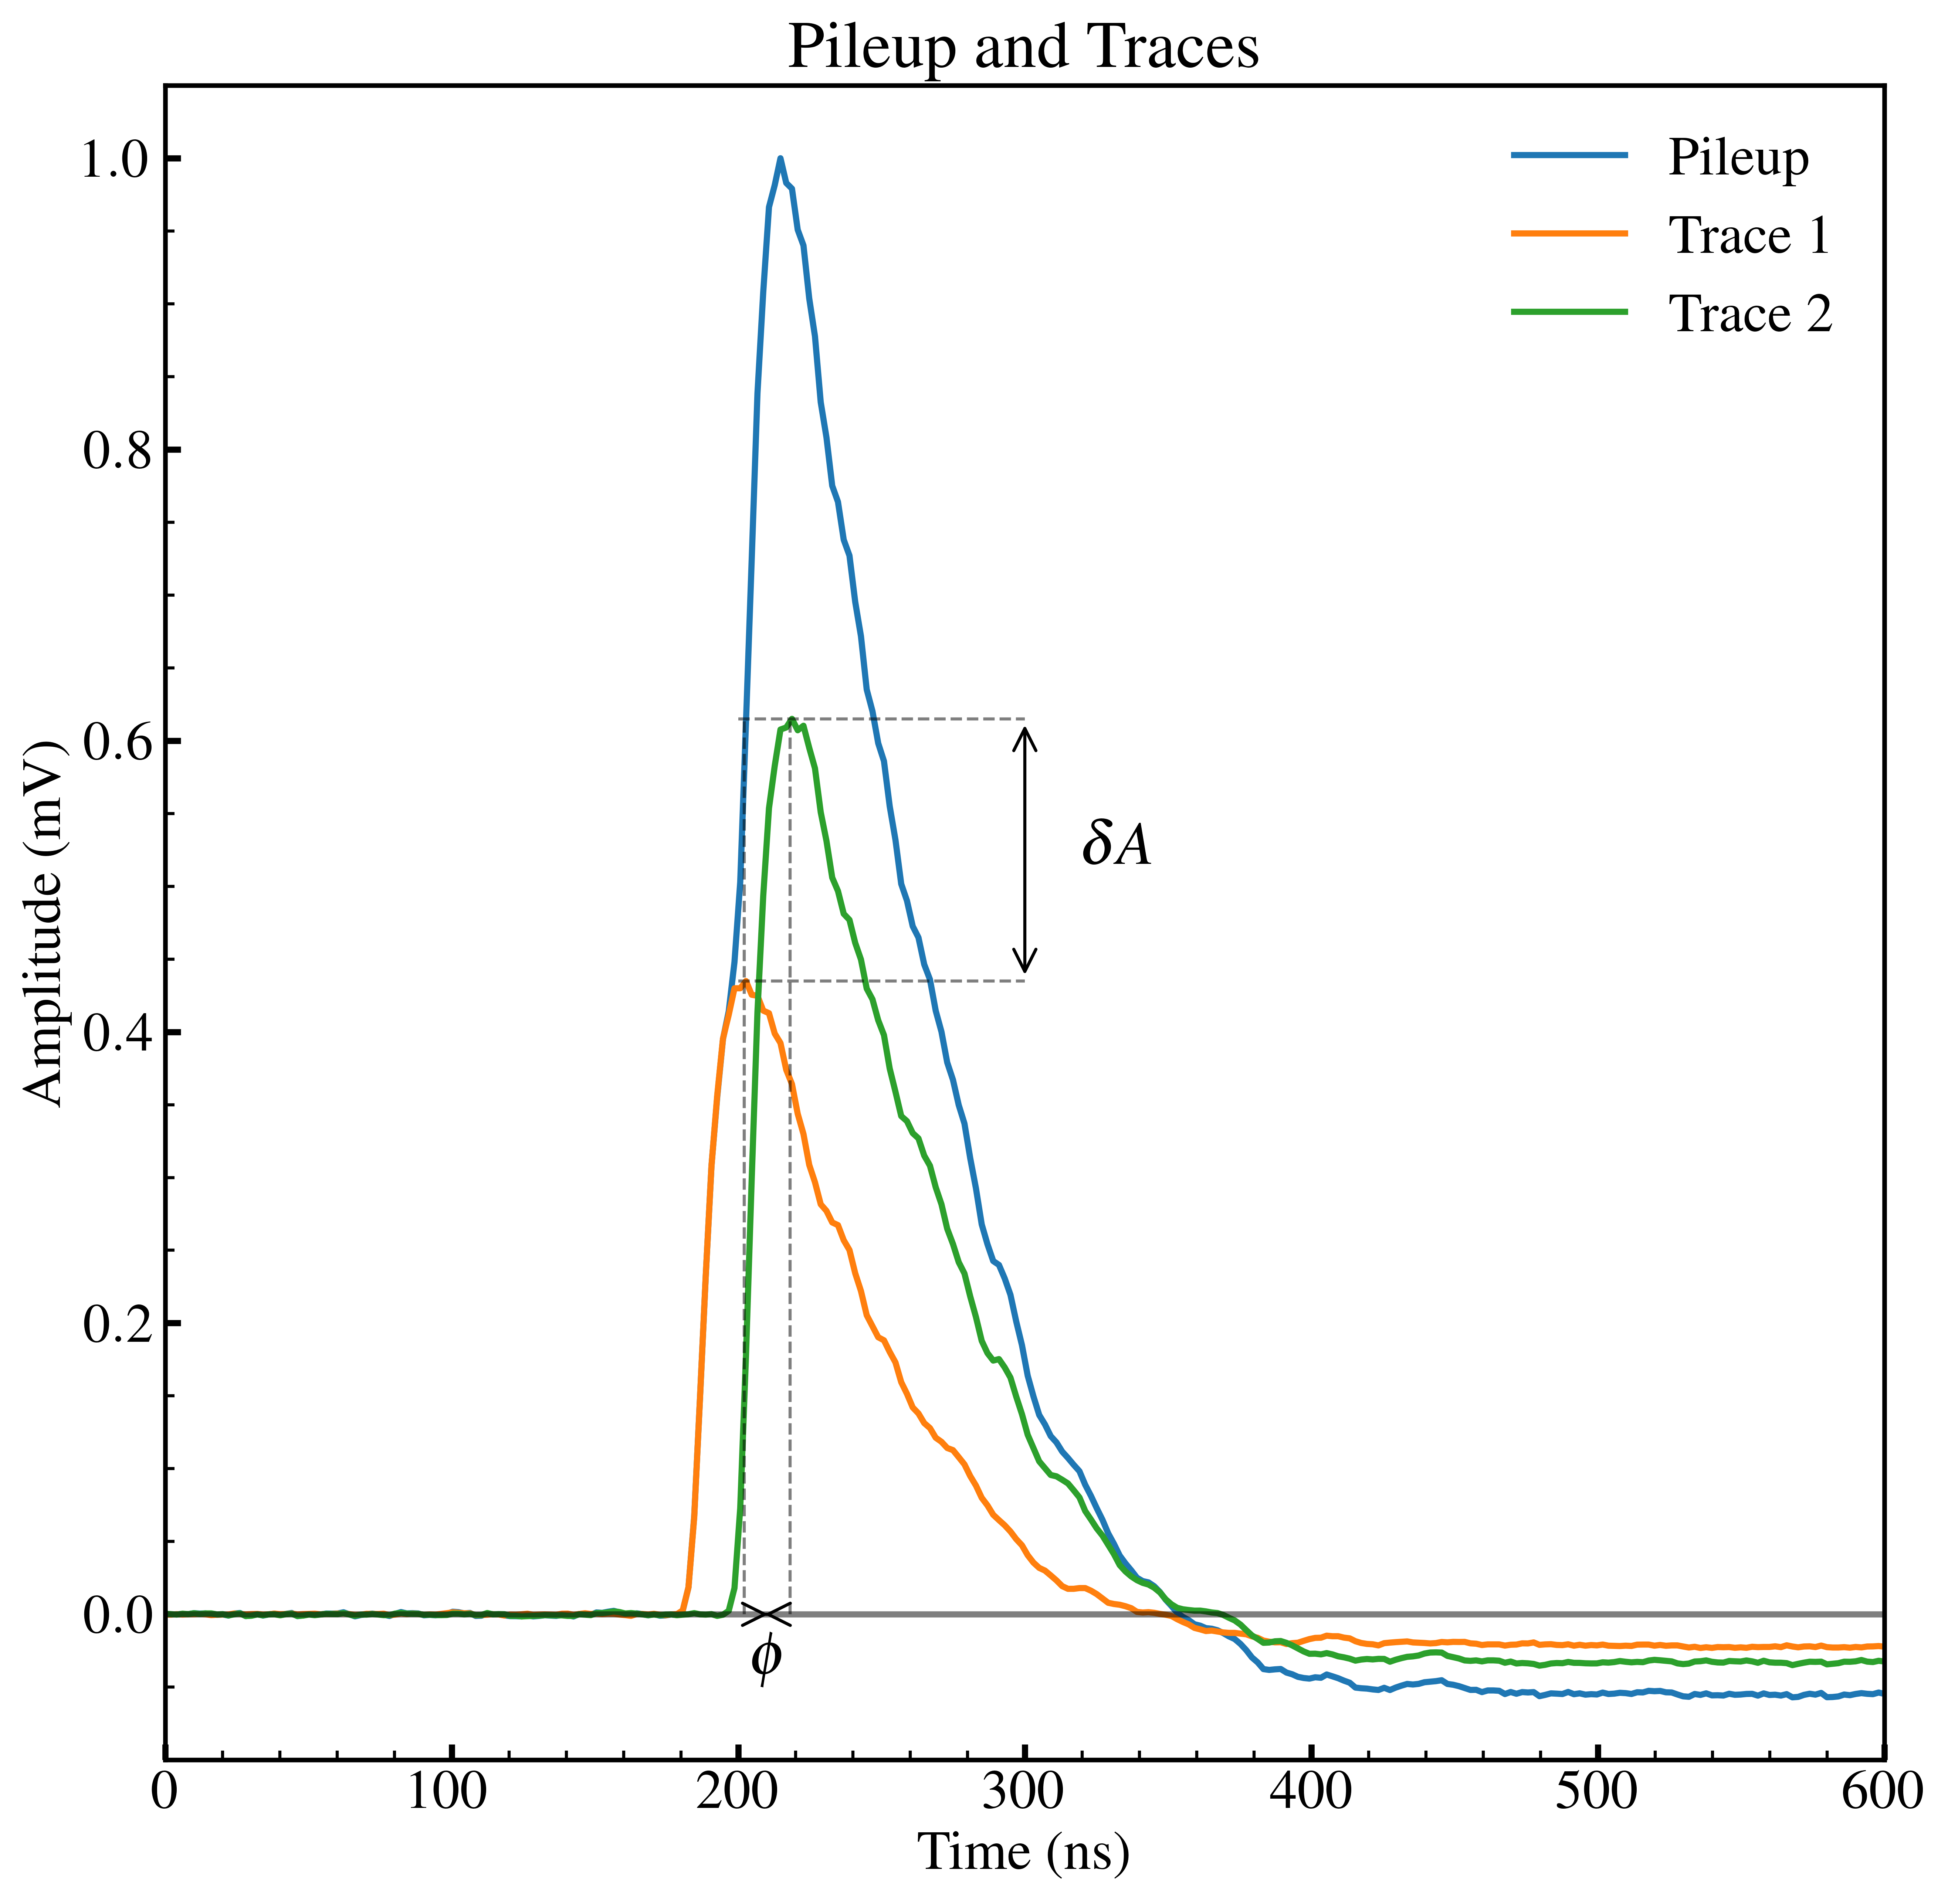

In [212]:
params = {'axes.labelsize': 18,
                'axes.linewidth' : 1.5,
                'font.size': 18,
                'font.family': 'times',
                'mathtext.fontset': 'stix',
                'legend.fontsize': 18,
                'xtick.labelsize': 18,
                'ytick.labelsize': 18,
                'text.usetex': True,
                'lines.linewidth': 2,
                'lines.linestyle': '-',
                'lines.markersize' : 6,
                'lines.markeredgewidth' : 1,
                'xtick.major.size' : 5,
                'xtick.minor.size' : 3,
                'xtick.major.width' : 2,
                'xtick.minor.width' : 1,
                'xtick.direction' : 'in',
                'ytick.major.size' : 5,
                'ytick.minor.size' : 3,
                'ytick.major.width' : 2,
                'ytick.minor.width' : 1,
                'ytick.direction' : 'in',
                'xtick.minor.visible' : True,
                'ytick.minor.visible' : True,
                'savefig.transparent': True,
                'errorbar.capsize': 1.5,
                }
plt.rcParams.update(params)

n = np.random.randint(0, len(x_trace))
ptrace = x_trace[n][0]
maxptrace = np.max(ptrace)
amp = y_amp[n]
phase = y_phase[n]
y1, y2 = y_trace[n]
t = np.linspace(0, 600,300)

fig = plt.figure(figsize=(10, 10), dpi=600)
ax = plt.subplot(111)
ax.plot(t, ptrace, label="Pileup")
ax.plot(t, y1, label="Trace 1")
ax.plot(t, y2, label="Trace 2")
ax.plot([2*np.argmax(y1), 2*np.argmax(y1)], [0,1.0*np.max([np.max(y1),np.max(y2)])], color="k", linestyle="--", alpha=0.5,linewidth=1.0)
ax.plot([2*np.argmax(y2), 2*np.argmax(y2)],[0,1.0*np.max([np.max(y1),np.max(y2)])], color="k", linestyle="--" ,linewidth=1.0)
ax.plot([200,300],[np.max(y1), np.max(y1)], color="k", linestyle="--" ,linewidth=1.0)
ax.plot([200,300],[np.max(y2), np.max(y2)], color="k", linestyle="--" ,linewidth=1.0)
ax.text((2*np.argmax(y1)+2*np.argmax(y2))/2, -0.05, r"$\phi$", fontsize=20, ha="center", va="bottom")
ax.text(320, (np.max([np.max(y2),np.max(y1)])-np.min([np.max(y2),np.max(y1)]))/2+np.min([np.max(y2),np.max(y1)]), r"$\delta A$", fontsize=20, ha="left", va="center")
ax.annotate("", xy=(300, np.max(y1)), xytext=(300, np.max(y2)), arrowprops=dict(arrowstyle="<->", color="k", linewidth=1.0))
ax.annotate("", xy=(1.95*np.argmax(y2), 0), xytext=(2.05*np.argmax(y1), 0), arrowprops=dict(arrowstyle="<->", color="k", linewidth=1.0))
ax.plot([0, 600], [0.0, 0.0], color="k", linestyle="-" )

ax.set_xlim(0, 600)
ax.set_ylim(-0.1, 1.05)
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Amplitude (mV)")
ax.set_title("Pileup and Traces")
ax.legend(frameon=False)
plt.show()
fig.savefig("plots/ExampleInputData.png", bbox_inches="tight")

In [158]:
control = pd.read_hdf('history/full-model-history/control_model_history.h5')
consecutive = pd.read_hdf('history/full-model-history/consecutive_model_history.h5')
full_transfer = pd.read_hdf('history/full-model-history/full_transfer_model_history.h5')
trace_transfer = pd.read_hdf('history/full-model-history/trace_transfer_model_history.h5')

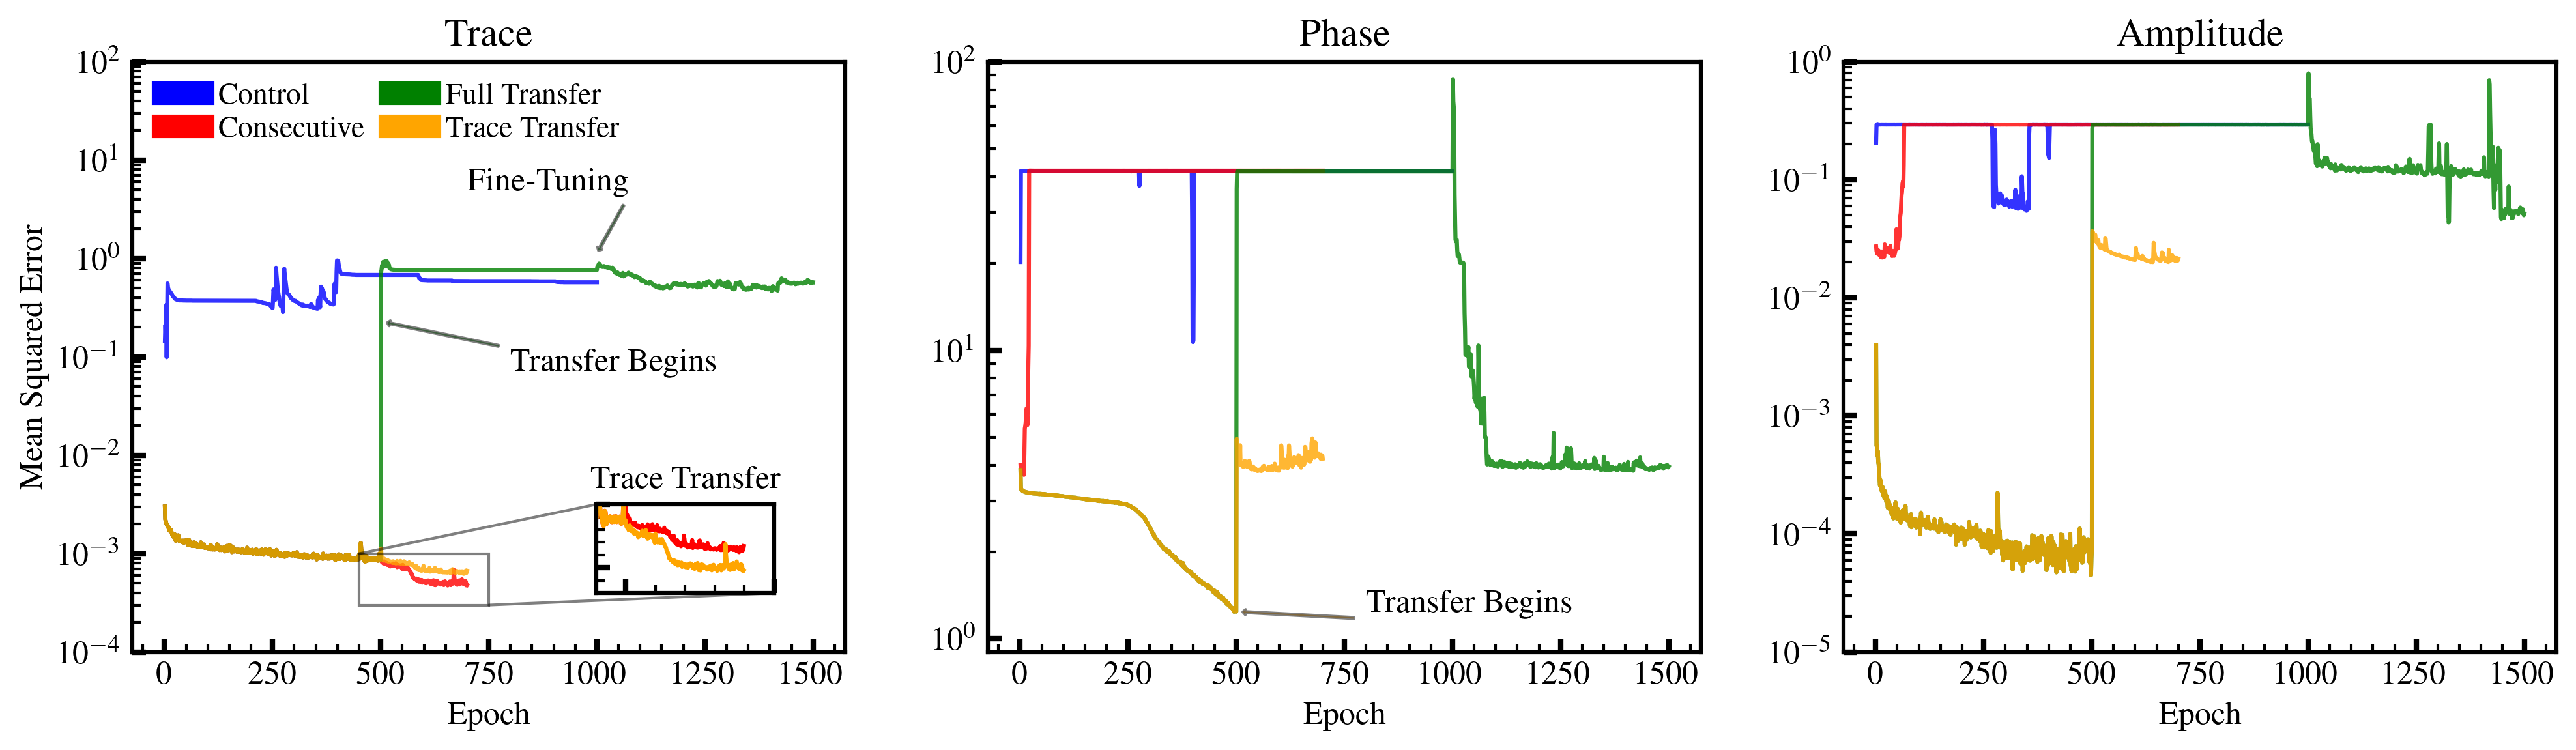

In [164]:
import matplotlib.patches as mpatches
params = {'axes.labelsize': 12,
                'axes.linewidth' : 1.5,
                'font.size': 12,
                'font.family': 'times',
                'mathtext.fontset': 'stix',
                'legend.fontsize': 12,
                'xtick.labelsize': 12,
                'ytick.labelsize': 12,
                'text.usetex': True,
                'lines.linewidth': 1.5,
                'lines.linestyle': '-',
                'lines.markersize' : 6,
                'lines.markeredgewidth' : 1,
                'xtick.major.size' : 5,
                'xtick.minor.size' : 3,
                'xtick.major.width' : 2,
                'xtick.minor.width' : 1,
                'xtick.direction' : 'in',
                'ytick.major.size' : 5,
                'ytick.minor.size' : 3,
                'ytick.major.width' : 2,
                'ytick.minor.width' : 1,
                'ytick.direction' : 'in',
                'xtick.minor.visible' : True,
                'ytick.minor.visible' : True,
                'savefig.transparent': True,
                'errorbar.capsize': 1.5,
                }
plt.rcParams.update(params)

fig = plt.figure(figsize=(16,4), dpi=300)
ax1 = fig.add_subplot(131)
ax1.plot(control["epoch"], control["trace_loss"], color="blue",alpha=0.8)
ax1.plot(consecutive["epoch"], consecutive["trace_loss"], color="orange",alpha=0.8)
ax1.plot(full_transfer["epoch"], full_transfer["trace_loss"], color="green",alpha=0.8)
ax1.plot(trace_transfer["epoch"], trace_transfer["trace_loss"], color="red",alpha=0.8)

# ax1.plot(control["epoch"], control["trace_val_loss"], color="blue",alpha=0.5, linestyle="--" )
# ax1.plot(consecutive["epoch"], consecutive["trace_val_loss"], color="red",alpha=0.5, linestyle="--" )
# ax1.plot(full_transfer["epoch"], full_transfer["trace_val_loss"], color="green",alpha=0.5, linestyle="--" )
# ax1.plot(trace_transfer["epoch"], trace_transfer["trace_val_loss"], color="orange",alpha=0.5, linestyle="--" )

ax2 = fig.add_subplot(132)
ax2.plot(control["epoch"], control["phase_loss"], color="blue",alpha=0.8)
ax2.plot(consecutive["epoch"], consecutive["phase_loss"], color="red",alpha=0.8)
ax2.plot(full_transfer["epoch"], full_transfer["phase_loss"], color="green",alpha=0.8)
ax2.plot(trace_transfer["epoch"], trace_transfer["phase_loss"], color="orange",alpha=0.8)

# ax2.plot(control["epoch"], control["phase_val_loss"], color="blue",alpha=0.5, linestyle="--" )
# ax2.plot(consecutive["epoch"], consecutive["phase_val_loss"], color="red",alpha=0.5, linestyle="--" )
# ax2.plot(full_transfer["epoch"], full_transfer["phase_val_loss"], color="green",alpha=0.5, linestyle="--" )
# ax2.plot(trace_transfer["epoch"], trace_transfer["phase_val_loss"], color="orange",alpha=0.5, linestyle="--" )

ax3 = fig.add_subplot(133)
ax3.plot(control["epoch"], control["amp_loss"], color="blue",alpha=0.8)
ax3.plot(consecutive["epoch"], consecutive["amp_loss"], color="red",alpha=0.8)
ax3.plot(full_transfer["epoch"], full_transfer["amp_loss"], color="green",alpha=0.8)
ax3.plot(trace_transfer["epoch"], trace_transfer["amp_loss"], color="orange",alpha=0.8)

# ax3.plot(control["epoch"], control["amp_val_loss"], color="blue",alpha=0.5, linestyle="--" )
# ax3.plot(consecutive["epoch"], consecutive["amp_val_loss"], color="red",alpha=0.5, linestyle="--" )
# ax3.plot(full_transfer["epoch"], full_transfer["amp_val_loss"], color="green",alpha=0.5, linestyle="--" )
# ax3.plot(trace_transfer["epoch"], trace_transfer["amp_val_loss"], color="orange",alpha=0.5, linestyle="--" )

ax1.set_xlabel("Epoch")
ax1.set_ylabel("Mean Squared Error")
ax1.set_title("Trace")
ax2.set_xlabel("Epoch")
ax2.set_title("Phase")
ax3.set_xlabel("Epoch")
ax3.set_title("Amplitude")

ax1.set_yscale("log")
ax2.set_yscale("log")
ax3.set_yscale("log")

ax1.legend(loc="upper left", frameon=False,
        handles=[mpatches.Patch(color="blue") , mpatches.Patch(color="red"), mpatches.Patch(color="green"), mpatches.Patch(color="orange")],
                #  ax1.plot([],[], color="black", linestyle="--",alpha=0.5)[0], ax1.plot([],[], color="black", linestyle="-")[0]],
        labels=["Control","Consecutive","Full Transfer","Trace Transfer"],
        ncol=2, fontsize=11, columnspacing=0.5, handletextpad=0.2, borderpad=0.2, labelspacing=0.2)

full_transfer_begins = 500
full_transfer_fine_tune_begins = 1000
trace_transfer_begins = 500
trace_transfer_fine_tune_begins = 500
fullarrow = dict(facecolor='green', shrink=0.05, width=0.5, headwidth=2, headlength=1, alpha=0.5)
tracearrow = dict(facecolor='orange', shrink=0.05, width=0.5, headwidth=2, headlength=1, alpha=0.5)

ax1.annotate("Transfer Begins", xy=(full_transfer_begins, full_transfer["trace_loss"][full_transfer_begins]-0.5),
             xytext=(full_transfer_begins+300, 0.1*full_transfer["trace_loss"][full_transfer_begins]),
             arrowprops=fullarrow)
ax1.annotate("Fine-Tuning", xy=(full_transfer_fine_tune_begins, full_transfer["trace_loss"][full_transfer_fine_tune_begins]+0.3),
                   xytext=(full_transfer_fine_tune_begins-300, 6*full_transfer["trace_loss"][full_transfer_fine_tune_begins]),
                         arrowprops=fullarrow)


# ax2.annotate("Transfer Begins", xy=(full_transfer_begins, full_transfer["phase_loss"][full_transfer_begins]-10.0),
#                    xytext=(full_transfer_begins+200, 0.5*full_transfer["phase_loss"][full_transfer_begins]),
#                 arrowprops=fullarrow)
# ax2.annotate("Fine-Tuning", xy=(full_transfer_fine_tune_begins-10, full_transfer["phase_loss"][full_transfer_fine_tune_begins]-10.0),
#         xytext=(full_transfer_fine_tune_begins-450, 0.02*full_transfer["phase_loss"][full_transfer_fine_tune_begins]),
#         arrowprops=fullarrow)
ax2.annotate("Transfer Begins", xy=(trace_transfer_fine_tune_begins, trace_transfer["phase_loss"][trace_transfer_fine_tune_begins-1]),
        xytext=(trace_transfer_fine_tune_begins+300, trace_transfer["phase_loss"][trace_transfer_fine_tune_begins-1]),
        arrowprops=tracearrow)


# ax3.annotate("Transfer Begins", xy=(full_transfer_begins, full_transfer["amp_loss"][full_transfer_begins]+0.3),
#              xytext=(full_transfer_begins-300, 10*full_transfer["amp_loss"][full_transfer_begins]),
#                    arrowprops=fullarrow)
# ax3.annotate("Fine-Tuning Begins", xy=(full_transfer_fine_tune_begins, full_transfer["amp_loss"][full_transfer_fine_tune_begins]+0.3),
#                    xytext=(full_transfer_fine_tune_begins-300, 10*full_transfer["amp_loss"][full_transfer_fine_tune_begins]),
#                    arrowprops=fullarrow)
# ax3.annotate("Fine-Tuning Begins", xy=(trace_transfer_fine_tune_begins, trace_transfer["amp_loss"][trace_transfer_fine_tune_begins]+0.3),
#              xytext=(trace_transfer_fine_tune_begins-300, 10*trace_transfer["amp_loss"][trace_transfer_fine_tune_begins]),
#              arrowprops=tracearrow)

ax1.set_ylim(0.0001, 100)
ax2.set_ylim(0.9, 100)
ax3.set_ylim(0.00001, 1)
# ax1.set_xscale("log")
# ax2.set_xscale("log")
# ax3.set_xscale("log")




axin1 = ax1.inset_axes([0.65, 0.10, 0.25, 0.15])
axin1.plot(trace_transfer["trace_loss"][trace_transfer_begins-50:], color="orange")
axin1.plot(consecutive["trace_loss"][trace_transfer_begins-50:], color="red")
# axin1.set_yscale("log")
axin1.set_ylim(0.0003, 0.001)
axin1.set_xlim(trace_transfer_begins-50, trace_transfer_begins+250)
axin1.set_yticklabels([])
axin1.set_xticklabels([])
axin1.set_title("Trace Transfer", fontsize=12)
ax1.indicate_inset_zoom(axin1, edgecolor="black")
# ax1.annotate("Transfer Learning Region", xy=(trace_transfer_begins+50, 0.001), xytext=(trace_transfer_begins+50, 0.001), color="orange")




                                                  
plt.show()
fig.savefig("plots/LossComparision.png",)

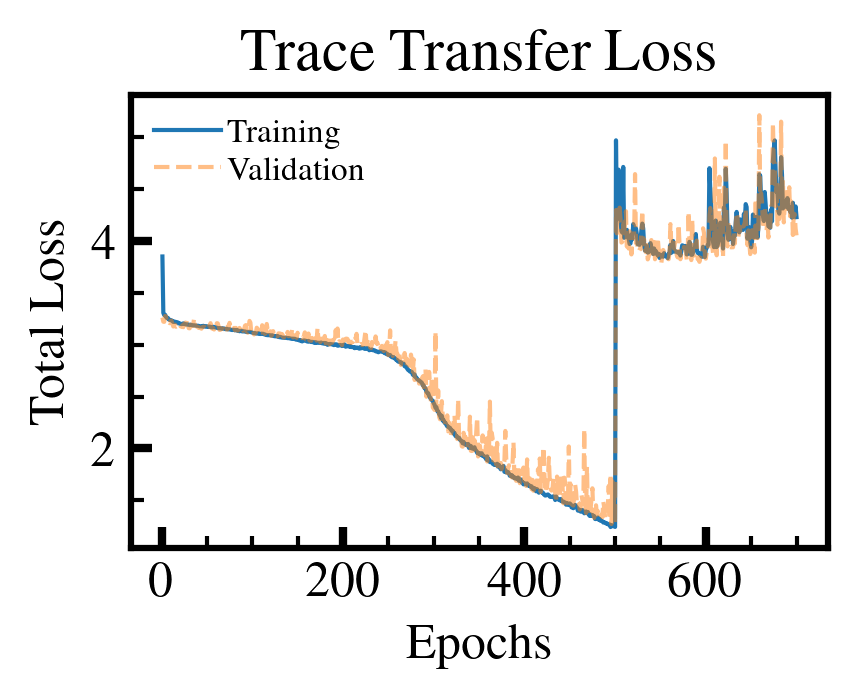

In [188]:
params = {'axes.labelsize': 12,
                'axes.linewidth' : 1.5,
                'font.size': 12,
                'font.family': 'times',
                'mathtext.fontset': 'stix',
                'legend.fontsize': 12,
                'xtick.labelsize': 12,
                'ytick.labelsize': 12,
                'text.usetex': True,
                'lines.linewidth': 1.0,
                'lines.linestyle': '-',
                'lines.markersize' : 6,
                'lines.markeredgewidth' : 1,
                'xtick.major.size' : 5,
                'xtick.minor.size' : 3,
                'xtick.major.width' : 2,
                'xtick.minor.width' : 1,
                'xtick.direction' : 'in',
                'ytick.major.size' : 5,
                'ytick.minor.size' : 3,
                'ytick.major.width' : 2,
                'ytick.minor.width' : 1,
                'ytick.direction' : 'in',
                'xtick.minor.visible' : True,
                'ytick.minor.visible' : True,
                'savefig.transparent': True,
                'errorbar.capsize': 1.5,
                }
plt.rcParams.update(params)


fig = plt.figure(figsize=(3,2), dpi=300)
ax = fig.add_subplot(111)

# ax.plot(control['epoch'], control['total_loss'], color="blue")
# # ax.plot(consecutive['epoch'], consecutive['total_loss'], color="red")
# ax.plot(full_transfer['epoch'], full_transfer['total_loss'], color="green")
ax.plot(trace_transfer['epoch'], trace_transfer['total_loss'])

# ax.plot(control['epoch'], control['total_val_loss'], color="blue", linestyle="--")
# ax.plot(consecutive['epoch'], consecutive['total_val_loss'], color="red", linestyle="--")
# ax.plot(full_transfer['epoch'], full_transfer['total_val_loss'], color="green", linestyle="--")
ax.plot(trace_transfer['epoch'], trace_transfer['total_val_loss'], linestyle="--", alpha=0.5)

# ax.set_yscale("log")
# ax.set_ylim(1, 300)
# ax.set_xscale("log")
ax.set_xlabel("Epochs")
ax.set_ylabel("Total Loss")
ax.set_title("Trace Transfer Loss")
ax.legend(["Training", "Validation"], loc="upper left", ncol=1, fontsize=8, columnspacing=0.1, handletextpad=0.2, borderpad=0.2, labelspacing=0.2, frameon=False)

fig.savefig("plots/TraceTransferLoss.png", bbox_inches='tight')

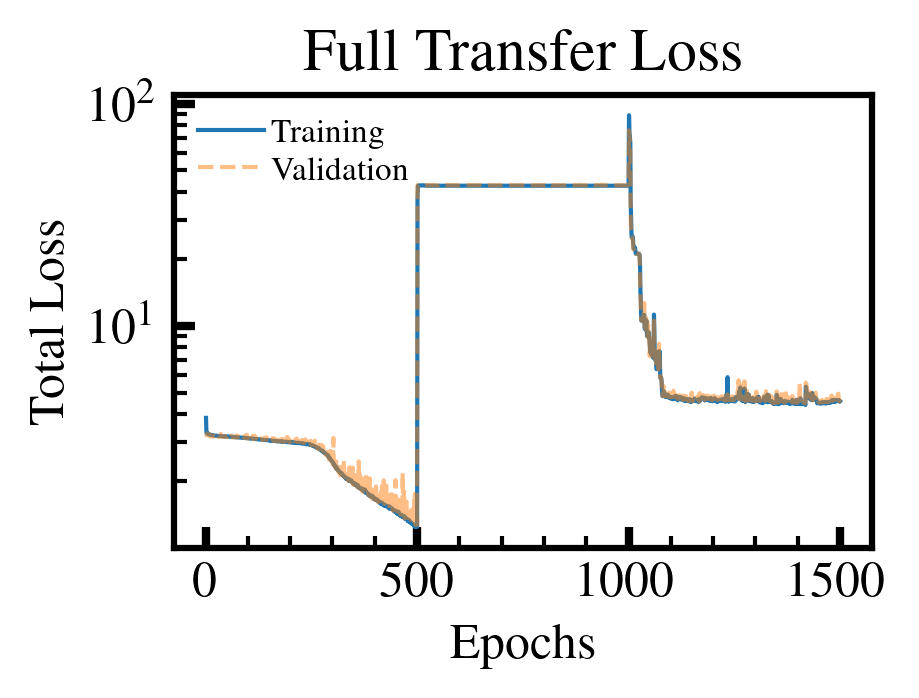

In [189]:
params = {'axes.labelsize': 12,
                'axes.linewidth' : 1.5,
                'font.size': 12,
                'font.family': 'times',
                'mathtext.fontset': 'stix',
                'legend.fontsize': 12,
                'xtick.labelsize': 12,
                'ytick.labelsize': 12,
                'text.usetex': True,
                'lines.linewidth': 1.0,
                'lines.linestyle': '-',
                'lines.markersize' : 6,
                'lines.markeredgewidth' : 1,
                'xtick.major.size' : 5,
                'xtick.minor.size' : 3,
                'xtick.major.width' : 2,
                'xtick.minor.width' : 1,
                'xtick.direction' : 'in',
                'ytick.major.size' : 5,
                'ytick.minor.size' : 3,
                'ytick.major.width' : 2,
                'ytick.minor.width' : 1,
                'ytick.direction' : 'in',
                'xtick.minor.visible' : True,
                'ytick.minor.visible' : True,
                'savefig.transparent': True,
                'errorbar.capsize': 1.5,
                }
plt.rcParams.update(params)


fig = plt.figure(figsize=(3,2), dpi=300)
ax = fig.add_subplot(111)

# ax.plot(control['epoch'], control['total_loss'], color="blue")
# # ax.plot(consecutive['epoch'], consecutive['total_loss'], color="red")
ax.plot(full_transfer['epoch'], full_transfer['total_loss'])
# ax.plot(trace_transfer['epoch'], trace_transfer['total_loss'], color="orange")

# ax.plot(control['epoch'], control['total_val_loss'], color="blue", linestyle="--")
# ax.plot(consecutive['epoch'], consecutive['total_val_loss'], color="red", linestyle="--")
ax.plot(full_transfer['epoch'], full_transfer['total_val_loss'], linestyle="--", alpha=0.5)
# ax.plot(trace_transfer['epoch'], trace_transfer['total_val_loss'], color="blue", linestyle="--", alpha=0.5)

ax.set_yscale("log")
# ax.set_ylim(1, 300)
# ax.set_xscale("log")
ax.set_xlabel("Epochs")
ax.set_ylabel("Total Loss")
ax.set_title("Full Transfer Loss")
ax.legend(["Training", "Validation"], loc="upper left", ncol=1, fontsize=8, columnspacing=0.1, handletextpad=0.2, borderpad=0.2, labelspacing=0.2, frameon=False)

fig.savefig("plots/FullTransferLoss.png", bbox_inches='tight')

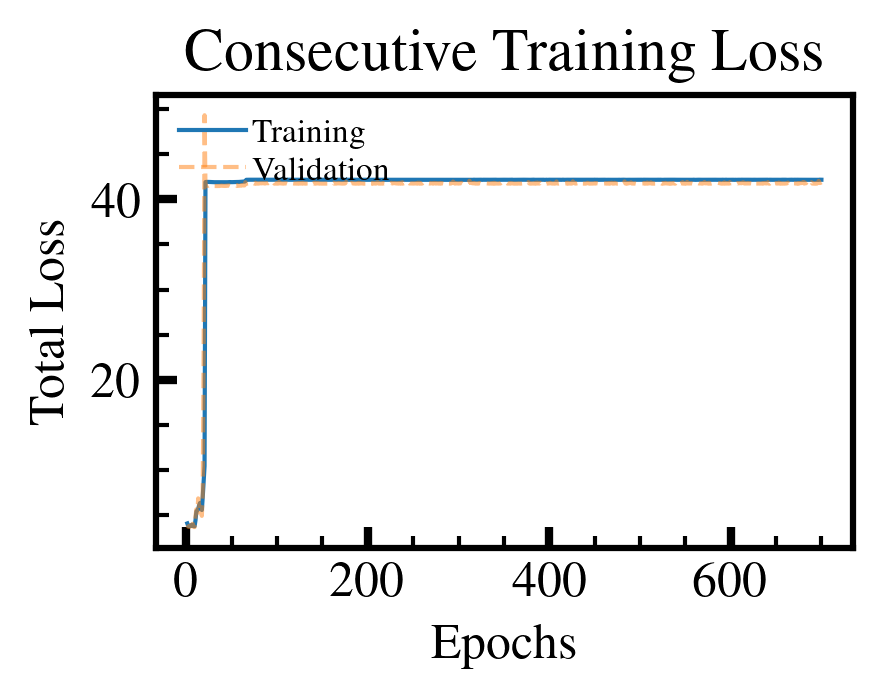

In [192]:
params = {'axes.labelsize': 12,
                'axes.linewidth' : 1.5,
                'font.size': 12,
                'font.family': 'times',
                'mathtext.fontset': 'stix',
                'legend.fontsize': 12,
                'xtick.labelsize': 12,
                'ytick.labelsize': 12,
                'text.usetex': True,
                'lines.linewidth': 1.0,
                'lines.linestyle': '-',
                'lines.markersize' : 6,
                'lines.markeredgewidth' : 1,
                'xtick.major.size' : 5,
                'xtick.minor.size' : 3,
                'xtick.major.width' : 2,
                'xtick.minor.width' : 1,
                'xtick.direction' : 'in',
                'ytick.major.size' : 5,
                'ytick.minor.size' : 3,
                'ytick.major.width' : 2,
                'ytick.minor.width' : 1,
                'ytick.direction' : 'in',
                'xtick.minor.visible' : True,
                'ytick.minor.visible' : True,
                'savefig.transparent': True,
                'errorbar.capsize': 1.5,
                }
plt.rcParams.update(params)


fig = plt.figure(figsize=(3,2), dpi=300)
ax = fig.add_subplot(111)

# ax.plot(control['epoch'], control['total_loss'])
ax.plot(consecutive['epoch'], consecutive['total_loss'])
# ax.plot(full_transfer['epoch'], full_transfer['total_loss'])
# ax.plot(trace_transfer['epoch'], trace_transfer['total_loss'], color="orange")

# ax.plot(control['epoch'], control['total_val_loss'], linestyle="--", alpha=0.5)
ax.plot(consecutive['epoch'], consecutive['total_val_loss'],  linestyle="--", alpha=0.5)
# ax.plot(full_transfer['epoch'], full_transfer['total_val_loss'], linestyle="--", alpha=0.5)
# ax.plot(trace_transfer['epoch'], trace_transfer['total_val_loss'], color="blue", linestyle="--", alpha=0.5)

# ax.set_yscale("log")
# ax.set_ylim(1, 300)
# ax.set_xscale("log")
ax.set_xlabel("Epochs")
ax.set_ylabel("Total Loss")
ax.set_title("Consecutive Training Loss")
ax.legend(["Training", "Validation"], loc="upper left", ncol=1, fontsize=8, columnspacing=0.1, handletextpad=0.2, borderpad=0.2, labelspacing=0.2, frameon=False)

fig.savefig("plots/ConsecutiveLoss.png", bbox_inches='tight')